This project aims to thoroughly analyze and model the given 
# "Breast Cancer Diagnose"
dataset. Here's a step-by-step guide, complete with explanations,
code snippets, and outputs, for exploratory data analysis (EDA), visualization, and predictive modeling. Let’s get started.

# 1. Understanding the Dataset
Before applying any machine learning models, we must understand the dataset and prepare it for analysis.

### Steps:

* Load the dataset.
* Check for missing values.
* Analyze column types and ensure data consistency.
* Summarize the dataset.

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv("Breast_cancer_diagnose.csv")

In [18]:
# Display the first few rows of the dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [19]:
# General information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [56]:
# Check for missing values
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [21]:
# Statistical summary
print(data.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

# 2. Data Cleaning
From the description, the column Unnamed: 32 has no values. We'll drop this column and any irrelevant features like id.

In [22]:
# Drop irrelevant columns
data = data.drop(columns=['id', 'Unnamed: 32'])

# Check the shape of the cleaned data
print(f"Cleaned dataset shape: {data.shape}")


Cleaned dataset shape: (569, 31)


# 3. Exploratory Data Analysis (EDA)
We analyze relationships and distributions to understand patterns in the data.

### 3.1 Distribution of Target Variable
diagnosis is the target variable. Let's check its distribution.

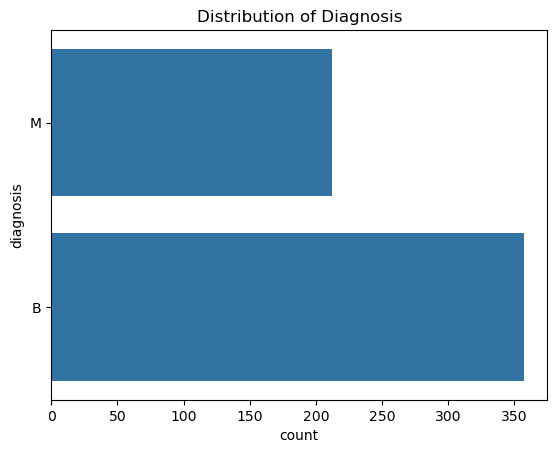

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of diagnosis
sns.countplot(data['diagnosis'])
plt.title("Distribution of Diagnosis")
plt.show()


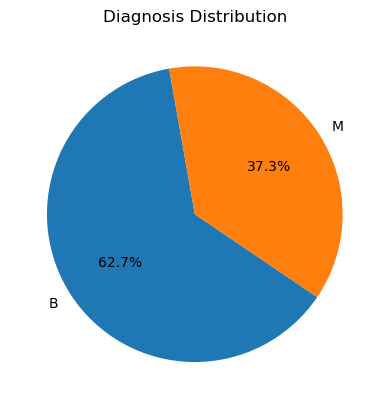

In [26]:
diagnosis_counts = data['diagnosis'].value_counts()
plt.pie(diagnosis_counts,labels=diagnosis_counts.index,autopct='%1.1f%%',startangle=100)
plt.title('Diagnosis Distribution')
plt.show()

### 3.2 Correlation Analysis
We'll visualize correlations between numeric features using a heatmap.

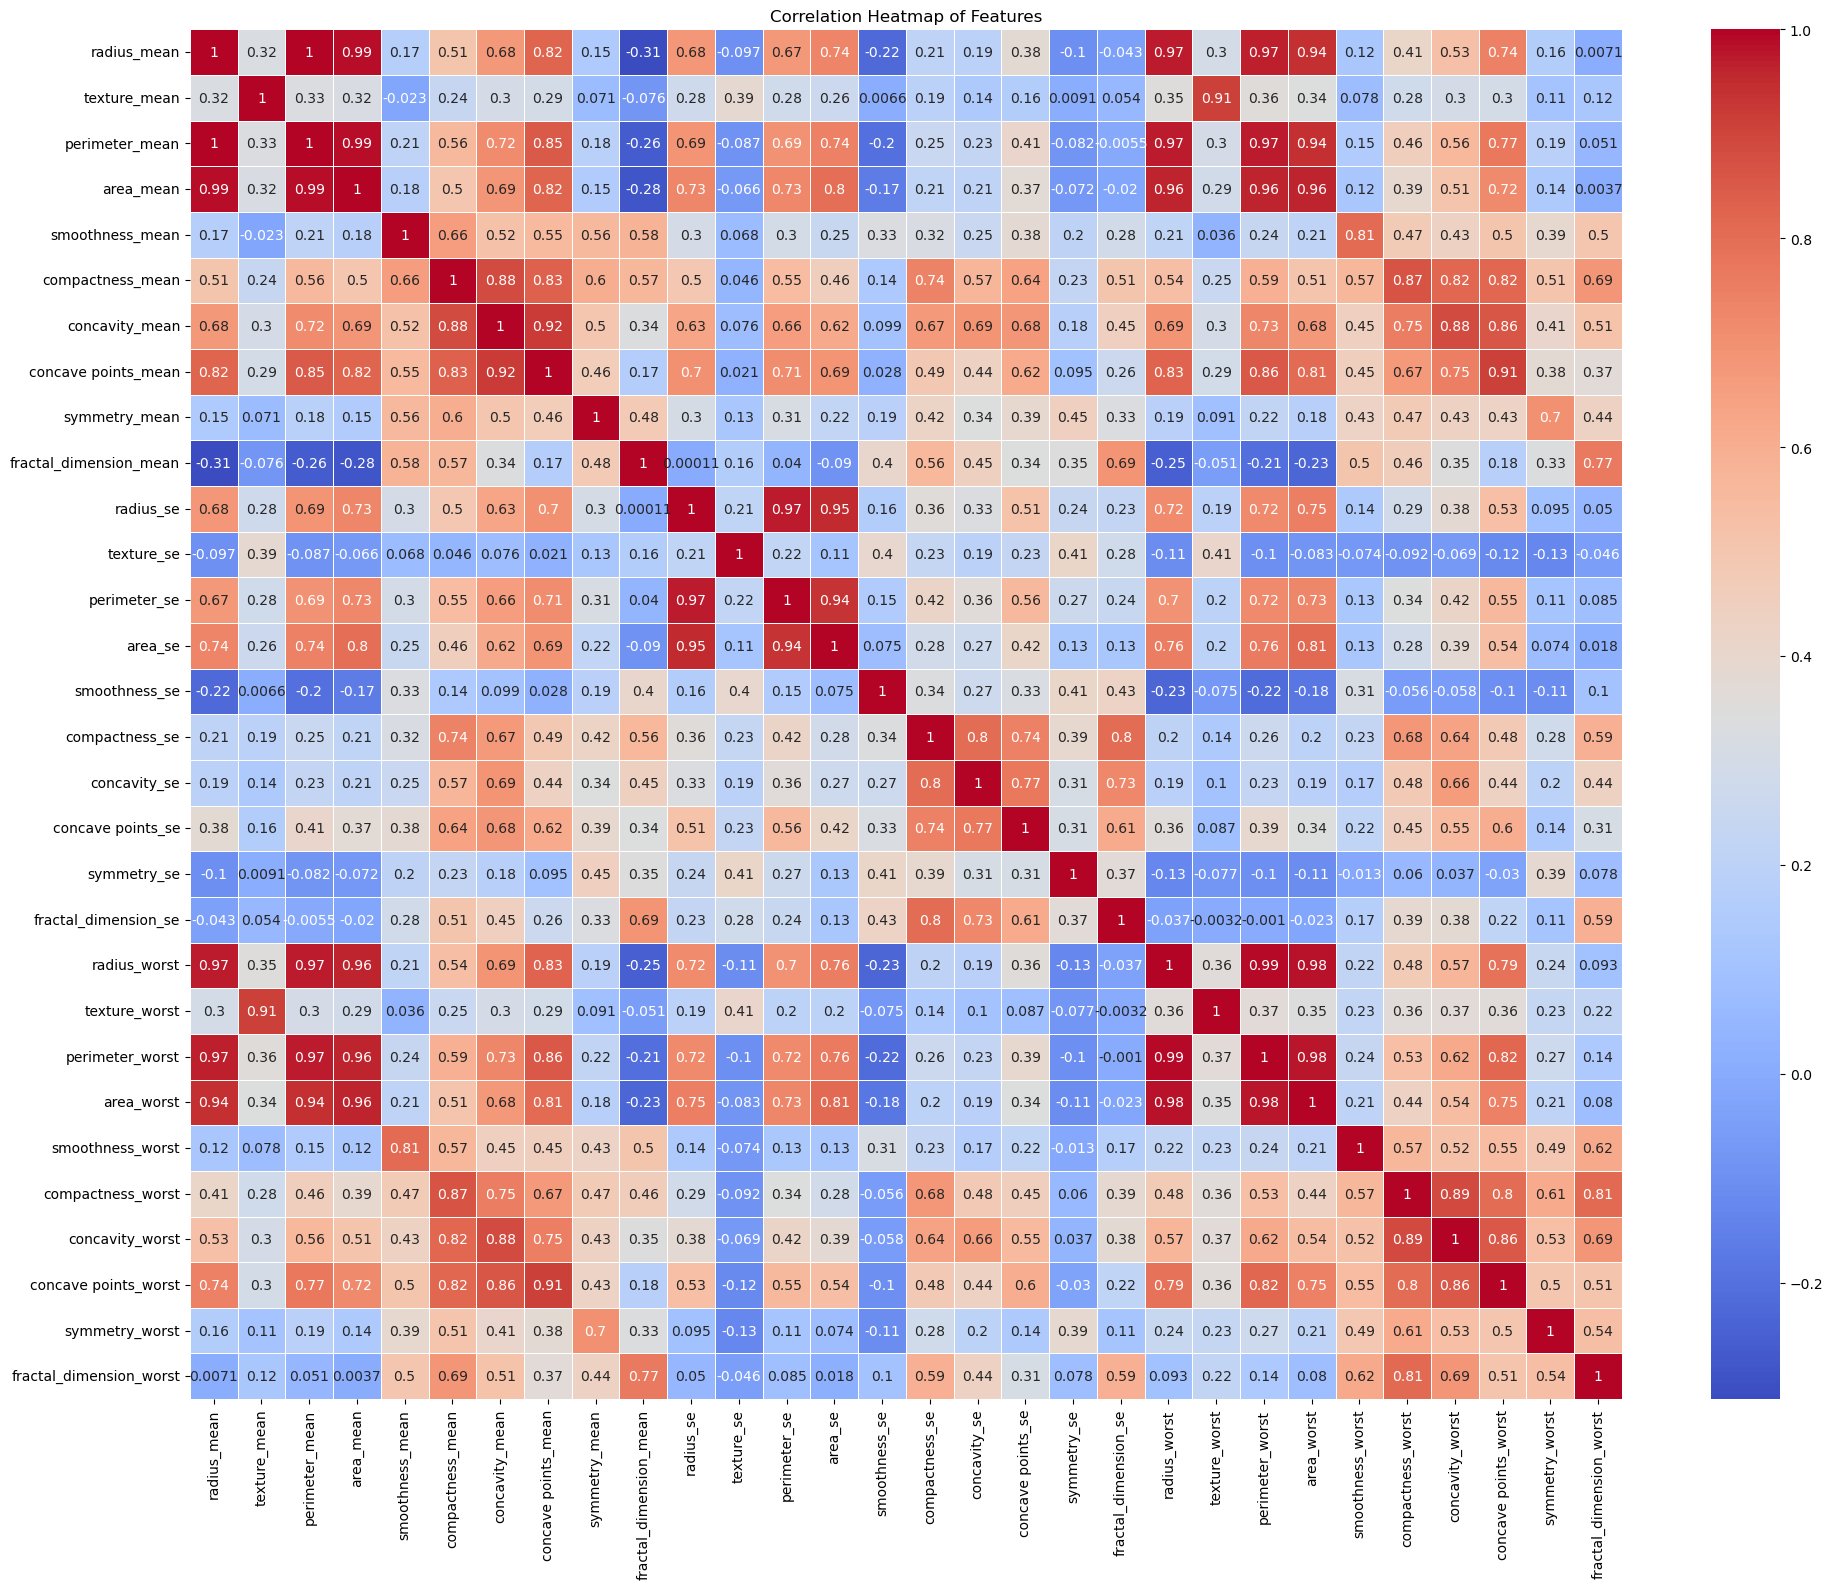

In [24]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


### 3.3 Pairplot of Key Features
Pairplots help visualize relationships between important features and the target.

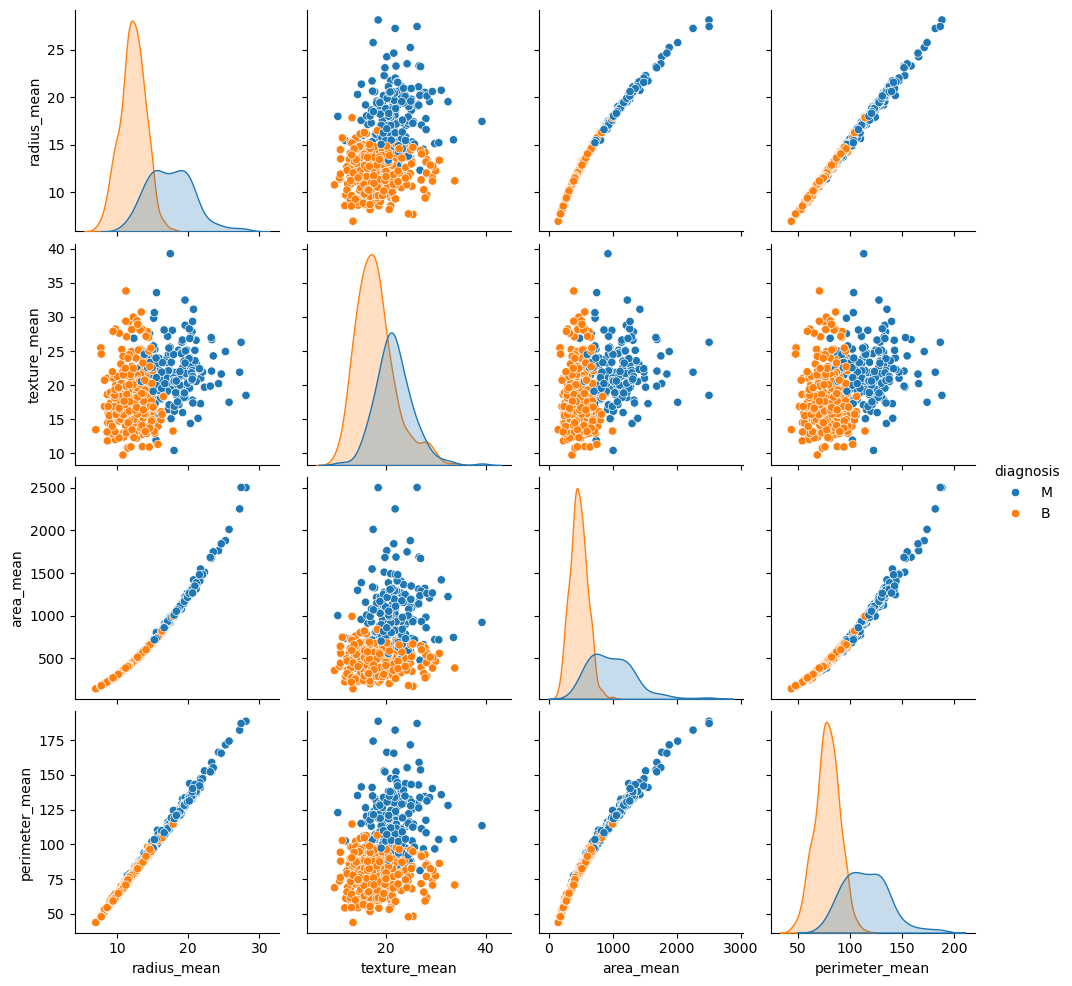

In [25]:
# Pairplot
sns.pairplot(data, vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean'], hue='diagnosis')
plt.show()


### 4. Preprocessing
Before modeling, we need to:
* Convert categorical labels to numerical (e.g., diagnosis).
* Normalize features for consistency.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode target variable
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Split data into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 5. Modeling
We'll apply various models, evaluate their performance, and visualize the results.

### 5.1 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 5.2 Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.956140350877193
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# 5.3 Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9298245614035088
[[67  4]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# 6. Visualization of Results


# 6.1 Compare the Models Performance
To compare the performance of the three models (Logistic Regression, SVM, and Decision Tree), we create a DataFrame containing metrics from their respective classification_reports, such as precision, recall, and f1-score. Then, we can visualize these comparisons using a bar plot.

           Logistic Regression       SVM  Decision Tree
precision             0.973719  0.956488       0.929825
recall                0.973684  0.956140       0.929825
f1-score              0.973621  0.956237       0.929825


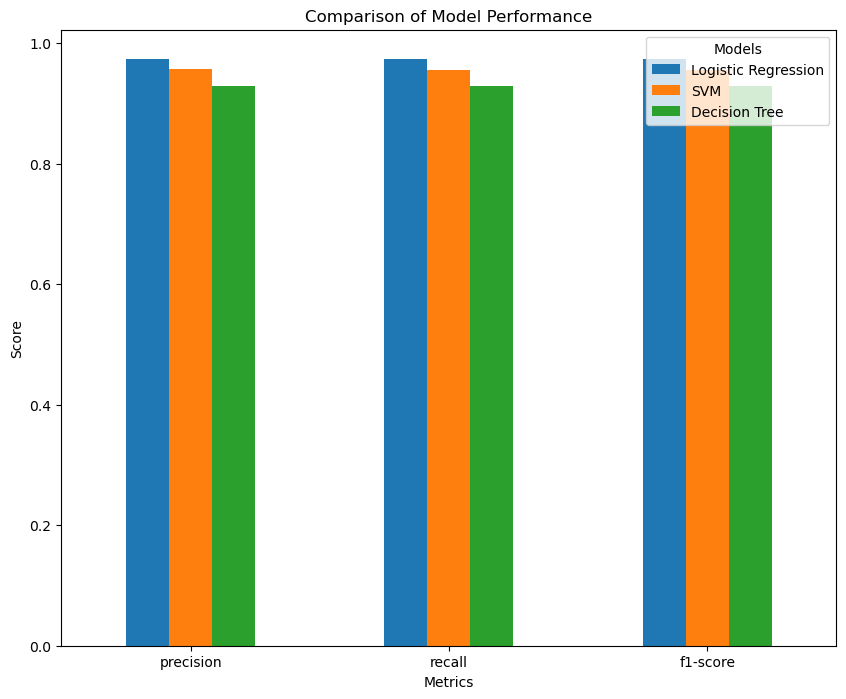

In [55]:

# Generate classification reports for each model
lr_report = classification_report(y_test, lr_model.predict(X_test), output_dict=True)
svm_report = classification_report(y_test, svm_model.predict(X_test), output_dict=True)
dt_report = classification_report(y_test, dt_model.predict(X_test), output_dict=True)

# Extract relevant metrics for comparison
metrics = ['precision', 'recall', 'f1-score']
comparison_df = pd.DataFrame({
    'Logistic Regression': [lr_report['weighted avg'][metric] for metric in metrics],
    'SVM': [svm_report['weighted avg'][metric] for metric in metrics],
    'Decision Tree': [dt_report['weighted avg'][metric] for metric in metrics]
}, index=metrics)

# Display the comparison DataFrame
print(comparison_df)

# Plot a bar chart for comparison
comparison_df.plot.bar(figsize=(10, 8))
plt.title("Comparison of Model Performance")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.show()


### 6.2 Confusion Matrix for SVM

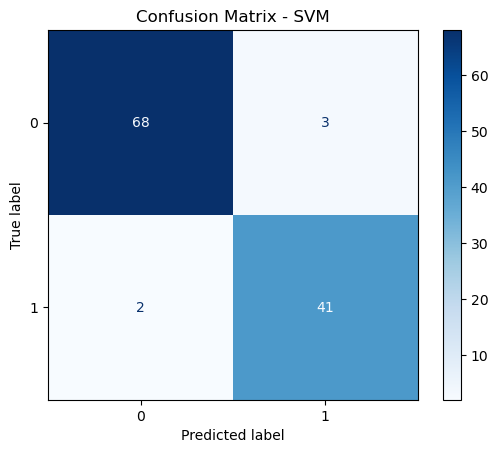

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

### 6.2 Confusion Matrix for Logistic Regression

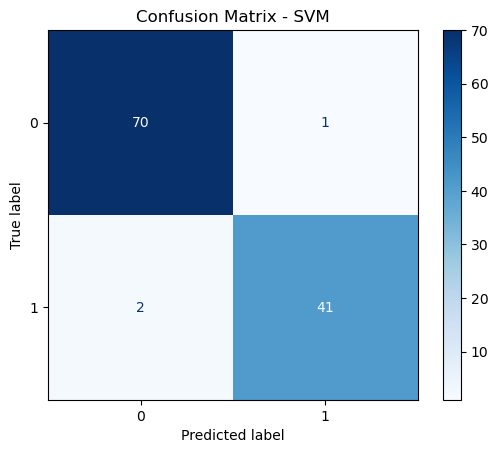

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

# 7. Prediction on New Data
Finally, let's predict with the Logistic Regression model on new input.

In [53]:
# Example new data with 30 features
new_data = [[14.5, 20.5, 96.5, 600.4, 0.1, 0.2, 0.3, 0.1, 0.2, 0.05,
             0.2, 0.3, 0.4, 0.1, 0.2, 0.1, 0.1, 0.3, 0.2, 0.2,
             16.5, 22.5, 115.5, 750.4, 0.12, 0.24, 0.34, 0.12, 0.23, 0.07]]

# Create a DataFrame with feature names
feature_names = X.columns  # Assuming 'X' is the original DataFrame with features
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Scale the new data
new_data_scaled = scaler.transform(new_data_df)

# Make a prediction
prediction = lr_model.predict(new_data_scaled)
print("Prediction:", "Malignant" if prediction[0] == 1 else "Benign")
# Corrected accuracy calculation
accuracy = accuracy_score(y_test, y_pred) 
print("Logistic Regression Accuracy:", round(accuracy, 2))

Prediction: Benign
Logistic Regression Accuracy: 0.97


# 8. Saving the Model
To save the trained model for later use, we can use Python's joblib or pickle libraries. Here’s the code for saving the model using joblib,
which is efficient for large NumPy arrays like the ones we often use in machine learning.

In [42]:
import joblib

# Save the  Logistic Regression model to a file
joblib.dump(lr_model, 'lr_model_Breast_Cancer.pkl')

print("Model saved as 'lr_model_Breast_Cancer.pkl'")

Model saved as 'lr_model_Breast_Cancer.pkl'
